<a href="https://colab.research.google.com/github/Heumpje/SSNOM-simulations/blob/main/Dipole_model_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# some preliminaries. Compile these first

#This function computes the effective polarizability of the point dipole model
def alphaeff(eps_p, eps_s, a, z):
    eps_0 = 1
    alpha=(4 * eps_0 * np.pi * a**3)*(eps_p-1)/(eps_p+2)
    beta=(eps_s-1)/(eps_s+1)
    num=alpha*(1+beta)
    den=1-alpha*beta/(16.0*np.pi*(z+a)**3)
    return num/den

#Scattering cross section
def compute_Csca(k, alphaeff):
    return (k**4/(6 * np.pi)) * np.abs(alphaeff) **2

#Absorption cross section
def compute_Cabs(k, alphaeff):
    return k * np.imag(alphaeff)

 # Compute the phase shift between incoming E field and outgoing E field
def compute_alpha_phase(alphaeff):
    return np.degrees(np.angle(alphaeff))

#compute the Efield of the effective dipole along the surface direction
def compute_Edip(alphafac, R, pos, a):
    Edip=np.zeros(npnts)
    for i in range(R.size):
      if np.abs(R[i]-pos-a)>a:
        Edip[i] =(np.abs(alphafac)**2)/(4*np.pi*(np.abs(R[i]-pos-a))**3)
      else:
        Edip[i] =(np.abs(alphafac)**2)/(4*np.pi*(np.abs(a))**3)
    return Edip

#Scattered field intensity
def compute_Isca(alphaeff):
    return np.abs(alphaeff)**2

#compute effective dielectric function for 2 materials next to each other
def compute_eps(x_values, eps_s1, eps_s2, a, pos):
    return (eps_s1*np.exp(-(x_values-pos)/a)+eps_s2)/(1+np.exp(-(x_values-pos)/a))

#plot graphs
def plot_result(x,y,xlab,ylab,title):
    plt.plot(x, y)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.ylim(0,max(y))
    plt.title(title)
    plt.grid(True)
    plt.show()

The following code computes the scattering and absorption cross-section for a probe sphere illuminated with IR radiation in proximity to a surface (see Figure). In class we will derive how the dipole moment $p=\alpha E(\omega)$ of the probe sphere is modified due to the proximity to the material we want to study.
The cross-sections for absorption and scattering are:

$C_{abs}=kIm\left(\alpha_{eff}\right)$

and

$C_{sca}=\frac{k^4}{6\pi}|\alpha_{eff}|^{2}$

The effective polarizability $\alpha_{eff}$ depends on the polarizability of the probe and the surface material.

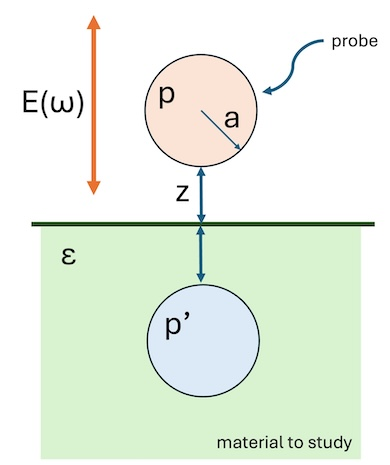

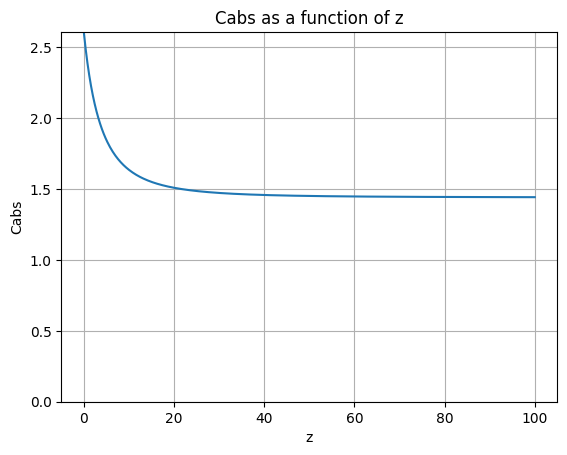

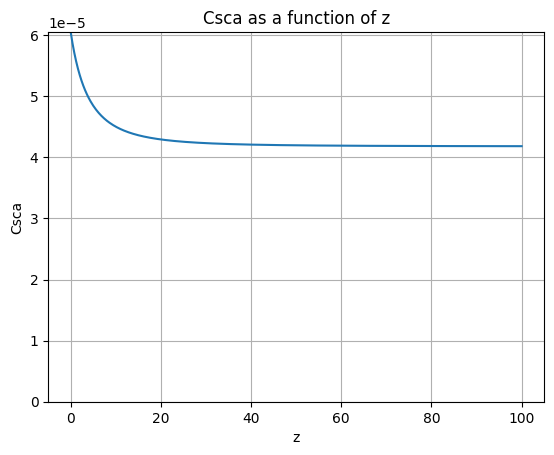

In [ ]:
# Constants
wavelength = 10000  # Wavelength in nanometers (i.e. 10 um)
a = 15 # sphere radius in meters (i.e. 30 nm)
# Wavenumber k
k = 2 * np.pi / wavelength
# Complex Dielectric constant probe
eps_p = -1e8+1e6j

# Complex Dielectric constant material
eps_s = 5+1j

# maximum separation and number of points
zmax = 100 #in nm
npnts = 500

# Define range of z values (separation between probe and sample)
z_values = np.linspace(1e-16, zmax, npnts)

# Compute effective polarizability alpha for each z value
alpha_values = alphaeff(eps_p, eps_s, a, z_values)

# Compute absorption cross section Cabs for each alpha value
Cabs_values = compute_Cabs(k, alpha_values)
Csca_values = compute_Csca(k, alpha_values)
phase_values = compute_alpha_phase(alpha_values)

# Plot Cabs as a function of z
plot_result(z_values,Cabs_values,'z','Cabs','Cabs as a function of z')

# Plot Csca as a function of z
plot_result(z_values,Csca_values,'z','Csca','Csca as a function of z')

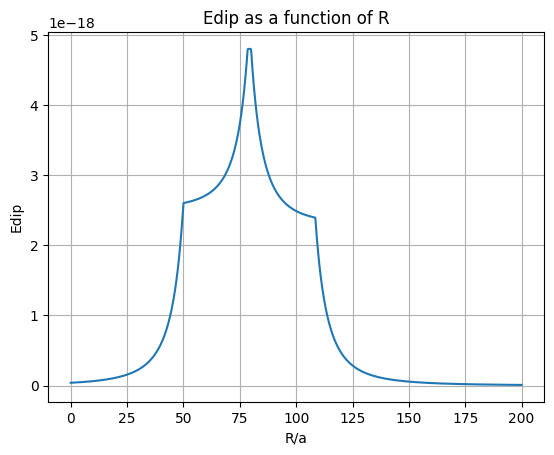

In [ ]:
# Define range of R values (Distance along surface from center of dipole)
a=15 #radius sphere, nm
z=1000 # height above the surface
sep=1.9*a #distance between spheres
pos1=50 # center position 1st sphere
npnts=1000
pos2=pos1+sep

# Complex Dielectric constant probe
eps_p = 3.0+0.0j
# Complex Dielectric constant dipole 1
eps_s1 = -10+5j
# Complex Dielectric constant dipole 2
eps_s2 = -20+12j


R_values = np.linspace(0, 200, npnts)
# Compute effective polarizability alpha for each z equal zero (sphere resting on surface)
alpha1_values = alphaeff(eps_p, eps_s1, a, z)
alpha2_values = alphaeff(eps_p, eps_s2, a, z)

Efield1_values = compute_Edip(alpha1_values, R_values, pos1, a)
Efield2_values = compute_Edip(alpha2_values, R_values, pos2, a)

#Uncomment if you want to scale to field at origin of dipole
#Efield1_values/=(np.abs(alph)**2)/(4*np.pi*(np.abs(a/2))**3)
#Efield2_values/=(np.abs(alph)**2)/(4*np.pi*(np.abs(a/2))**3)
#R_values/=a
Efield_values=Efield1_values+Efield2_values

# Plot Cabs as a function of z
plt.plot(R_values, Efield_values)
plt.xlabel('R/a')
plt.ylabel('Edip')
plt.title('Edip as a function of R')
plt.grid(True)
plt.show()

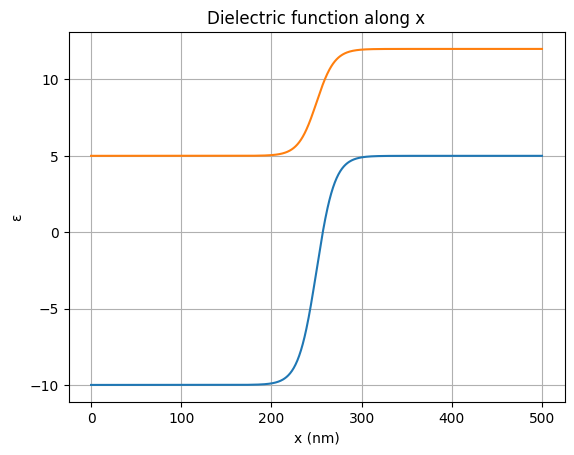

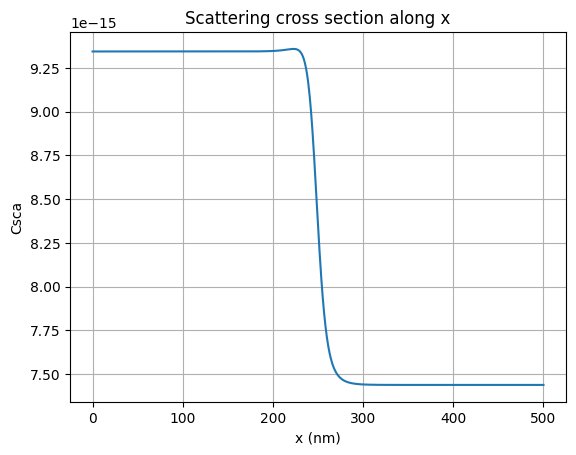

In [ ]:
# Define range of R values (Distance along surface from center of dipole)
a=10 #radius sphere, nm
wavelength = 10000  # Wavelength in nanometers (i.e. 10 um)
# Wavenumber k
k = 2 * np.pi / wavelength
z=1000 # height above the surface
scan_range=500
npnts=1000

# Complex Dielectric constant probe
eps_p = 3.0+0.0j
# Complex Dielectric constant material 1
eps_s1 = -10+5j
# Complex Dielectric constant material 2
eps_s2 = 5+12j

x_values = np.linspace(0, scan_range, npnts)

eps_values = compute_eps(x_values, eps_s1, eps_s2, a, scan_range/2)

alphaeff_values= alphaeff(eps_p, eps_values, a, z)

# Compute absorption cross section Cabs for each alpha value
Cabs_values = compute_Cabs(k, alphaeff_values)
Csca_values = compute_Csca(k, alphaeff_values)
Isca_values = compute_Isca(alphaeff_values)
phase_values = compute_alpha_phase(alphaeff_values)

# Plot dielectric function along the surface
plt.plot(x_values, np.real(eps_values),x_values, np.imag(eps_values))
plt.xlabel('x (nm)')
plt.ylabel('ε')
plt.title('Dielectric function along x')
plt.grid(True)
plt.show()

# Plot Scattered intensity as function of x along the surface
plt.plot(x_values, Isca_values)
plt.xlabel('x (nm)')
plt.ylabel('Isca')
plt.title('Scattered intensity scanning along x')
plt.grid(True)
plt.show()